importing libs

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

api key & stock info

In [2]:
with open('api.txt', 'r') as file:
    api_key = file.readline().strip()
    
api_key = api_key

symbol = input("Enter the symbol/ticker: ")
# symbol = 'JPM'  # Stock symbol
interval = '1d'  # Daily data

creating o/p dir

In [3]:
output_dir = 'stock_analysis'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

initializing alpha vantage api 

In [4]:
ts = TimeSeries(key=api_key, output_format='pandas')

fetching stock price data

In [5]:
data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
data = data.iloc[::-1]  # Reverse data for chronological order

calculating the daily returns

In [6]:
data['Daily_Return'] = data['4. close'].astype(float).pct_change()

creating analysis dir

In [7]:
analysis_dir = os.path.join(output_dir, symbol)
if not os.path.exists(analysis_dir):
    os.makedirs(analysis_dir)

ploting stock price chart

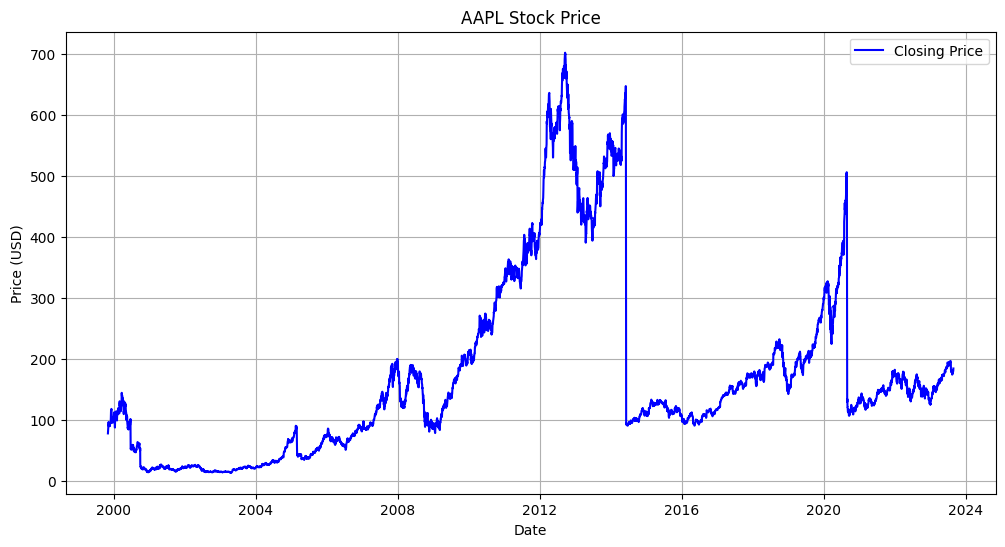

In [9]:
plt.figure(figsize=(12, 6))
plt.title(f'{symbol} Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.plot(data.index, data['4. close'].astype(float), label='Closing Price', color='blue')
plt.legend()
plt.grid(True)